In [ ]:
import pandas as pd

row_sales = pd.read_csv("raw_sales.csv", date_parser=["datesold"])
ma_lga = pd.read_csv("ma_lga_12345.csv")

ma_lga.saledate = pd.to_datetime(ma_lga.saledate)

<Axes: xlabel='saledate'>

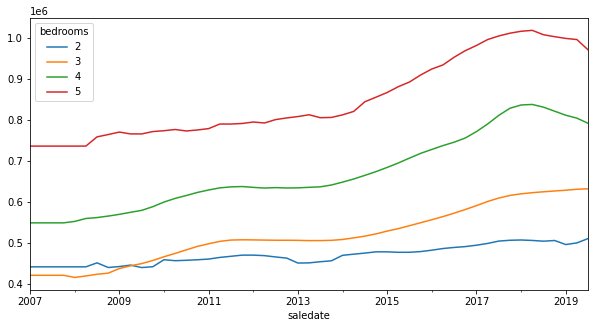

In [2]:
house_train = ma_lga[ma_lga['type'] == 'house'].pivot(index='saledate', columns='bedrooms', values='MA').interpolate(method='linear', limit_direction='both')
house_train.plot(figsize=(10,5))

<Axes: xlabel='saledate'>

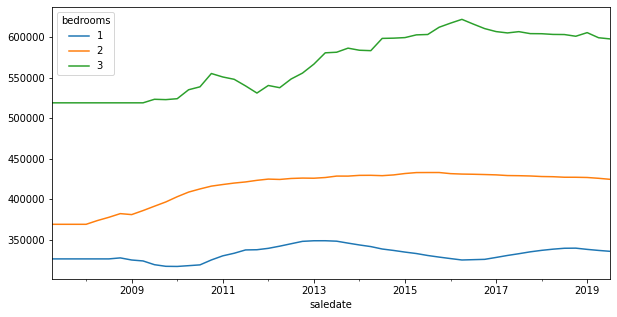

In [3]:
unit_train = ma_lga[ma_lga['type'] == 'unit'].pivot(index='saledate', columns='bedrooms', values='MA').interpolate(method='linear', limit_direction='both')
unit_train.plot(figsize=(10,5))

In [4]:
train = unit_train[:int(0.8*(len(unit_train)))]
test = unit_train[int(0.8*(len(unit_train))):]

from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train, freq='Q-DEC')
model_fit = model.fit()

#Forecast based on train data
forecast = model_fit.forecast(model_fit.endog, steps=len(test))

In [5]:
cols = unit_train.columns
pred = pd.DataFrame(index=test.index, data=forecast,columns=[cols])
pred=pred.astype(int)
pred.tail()

bedrooms,1,2,3
saledate,,,
2018-09-30,324531,433376,610079
2018-12-31,324228,434119,610645
2019-03-31,323991,434892,611244
2019-06-30,323814,435686,611881
2019-09-30,323692,436496,612560


<Axes: xlabel='saledate'>

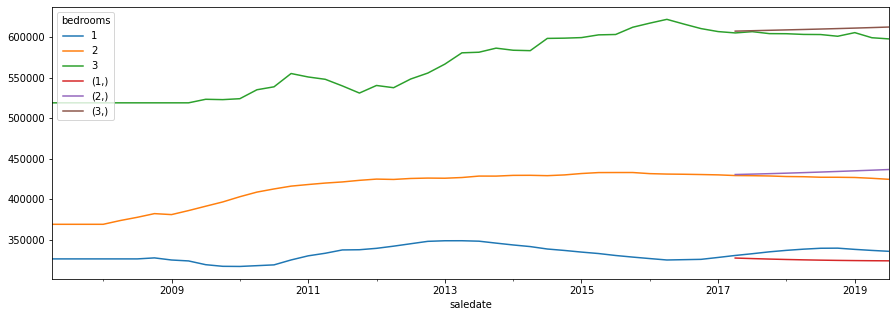

In [6]:
ax = unit_train.plot()
pred.plot(ax=ax,figsize=(15,5))

In [7]:
import numpy as np
for col in unit_train.columns:
    print (str(col) +' bedrooms ' + str(np.mean(np.abs((unit_train[col].iloc[-len(pred):].values - pred[[col]].values) / unit_train[col].iloc[-len(pred):].values)) * 100))

1 bedrooms 3.290113968743993
2 bedrooms 1.3866887076933525
3 bedrooms 1.119587354576797


<Axes: xlabel='saledate'>

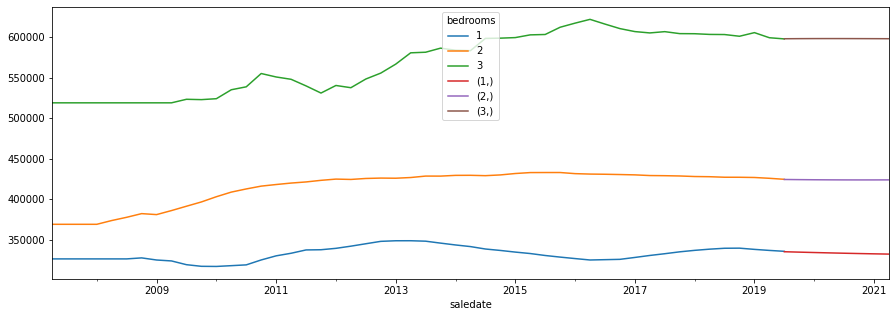

In [8]:
model = VAR(endog=unit_train, freq='Q-DEC')
model_fit = model.fit()
forecast_period=8
prediction = model_fit.forecast(model_fit.endog, steps=forecast_period)
cols = unit_train.columns
forecast_index = pd.date_range(start ='2019-09-30', freq ='Q', periods=forecast_period) 
pred = pd.DataFrame(index=forecast_index, data=prediction,columns=[cols])
ax = unit_train.plot()
pred.plot(ax=ax,figsize=(15,5))

In [10]:
import numpy as np
from prophet import Prophet


def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def model_prohpet_train(df, idx):
  train = pd.DataFrame({"y": df[idx]}).reset_index().rename(columns={"saledate":"ds"})
  predictions = 10
  model = Prophet()
  model.fit(train[:-predictions])
  future = model.make_future_dataframe(periods=10, freq='Q')
  forecast = model.predict(future)
  error = mean_absolute_percentage_error(train[-predictions:]['y'], forecast[-predictions:]['yhat'])
  print("Mean absolute percentage error {0:.2f}%".format(error))
  _ = model.plot(forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps37xk2we/9ghnbe36.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps37xk2we/z_raxdtw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29019', 'data', 'file=/tmp/tmps37xk2we/9ghnbe36.json', 'init=/tmp/tmps37xk2we/z_raxdtw.json', 'output', 'file=/tmp/tmps37xk2we/prophet_modelxy2ko3_3/prophet_model-20230320193435.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:34:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:34:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean absolute percentage error 3.41%


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps37xk2we/yhgz4upi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps37xk2we/ae_qj32h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89223', 'data', 'file=/tmp/tmps37xk2we/yhgz4upi.json', 'init=/tmp/tmps37xk2we/ae_qj32h.json', 'output', 'file=/tmp/tmps37xk2we/prophet_modelvf5xuir1/prophet_model-20230320193435.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:34:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:34:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

Mean absolute percentage error 0.81%


19:34:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean absolute percentage error 7.35%


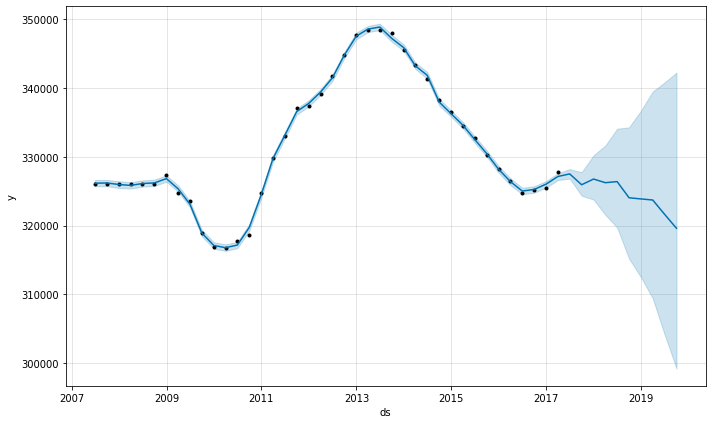

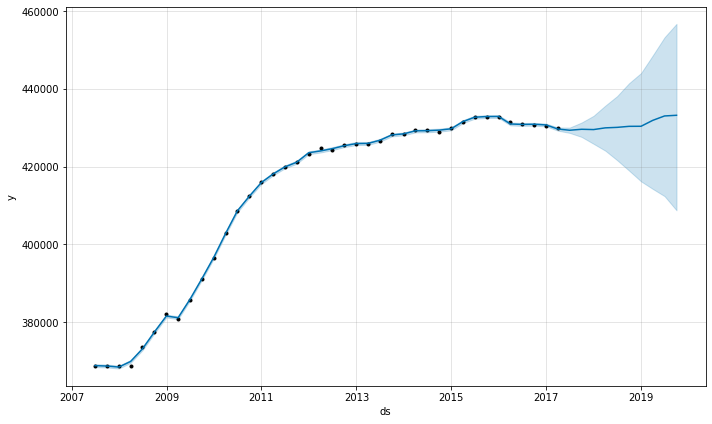

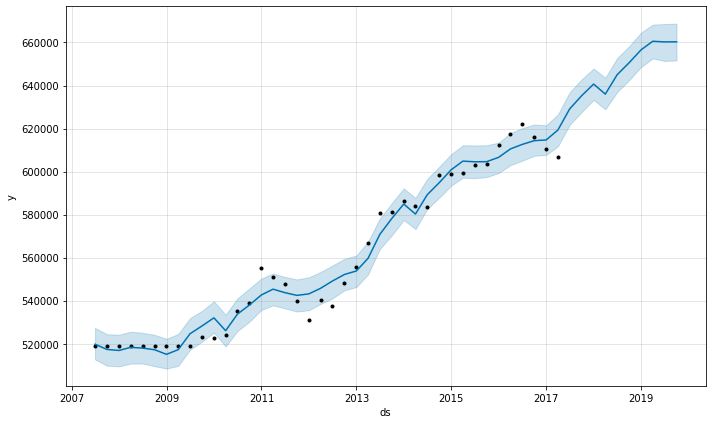

In [11]:
for idx in unit_train.columns:
  model_prohpet_train(unit_train, idx)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps37xk2we/vt3obx3t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps37xk2we/gsq9vyly.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7241', 'data', 'file=/tmp/tmps37xk2we/vt3obx3t.json', 'init=/tmp/tmps37xk2we/gsq9vyly.json', 'output', 'file=/tmp/tmps37xk2we/prophet_modelxctdl24_/prophet_model-20230320193456.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:34:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:34:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality

Mean absolute percentage error 1.64%


19:34:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps37xk2we/lijh4wtz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps37xk2we/l6wd8hvr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62637', 'data', 'file=/tmp/tmps37xk2we/lijh4wtz.json', 'init=/tmp/tmps37xk2we/l6wd8hvr.json', 'output', 'file=/tmp/tmps37xk2we/prophet_modelw6ksufd2/prophet_model-20230320193457.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:34:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean absolute percentage error 2.22%


19:34:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps37xk2we/_y081f5t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps37xk2we/cxctisif.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19901', 'data', 'file=/tmp/tmps37xk2we/_y081f5t.json', 'init=/tmp/tmps37xk2we/cxctisif.json', 'output', 'file=/tmp/tmps37xk2we/prophet_modelx73o6mq1/prophet_model-20230320193458.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:34:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean absolute percentage error 3.82%


19:34:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean absolute percentage error 5.37%


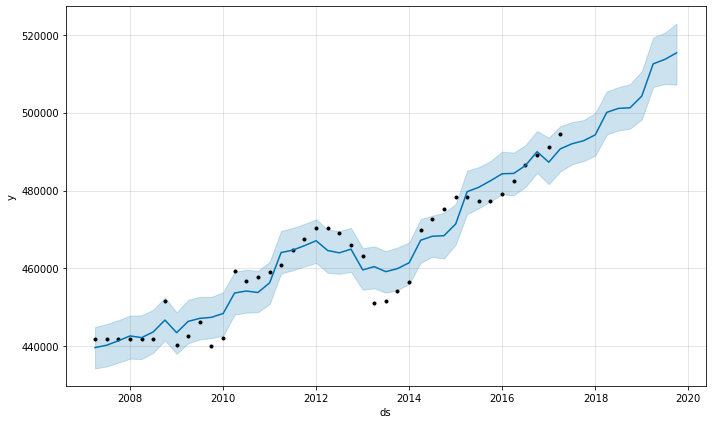

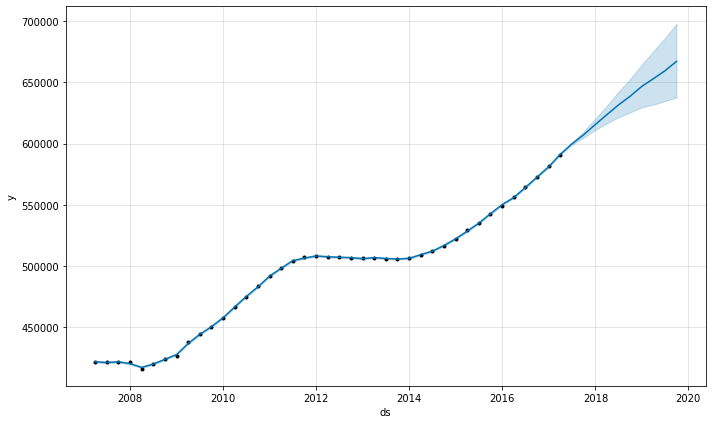

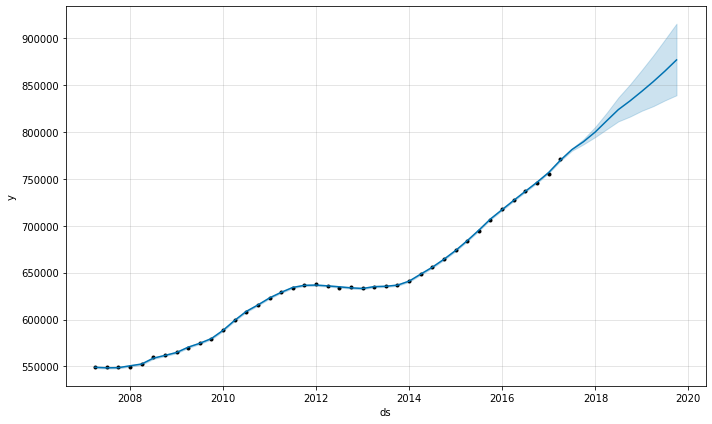

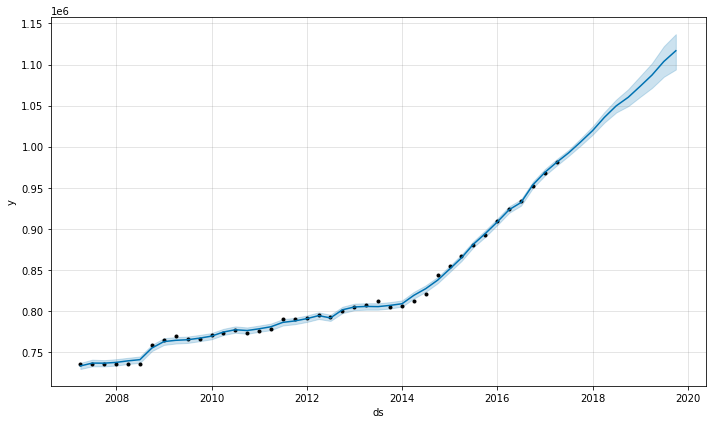

In [12]:
for idx in house_train.columns:
  model_prohpet_train(house_train, idx)

In [ ]:
!pip3 install gluonts
!pip3 install "gluonts[mxnet,pro]"

100%|██████████| 50/50 [00:02<00:00, 23.20it/s, epoch=20/20, avg_epoch_loss=10.4]


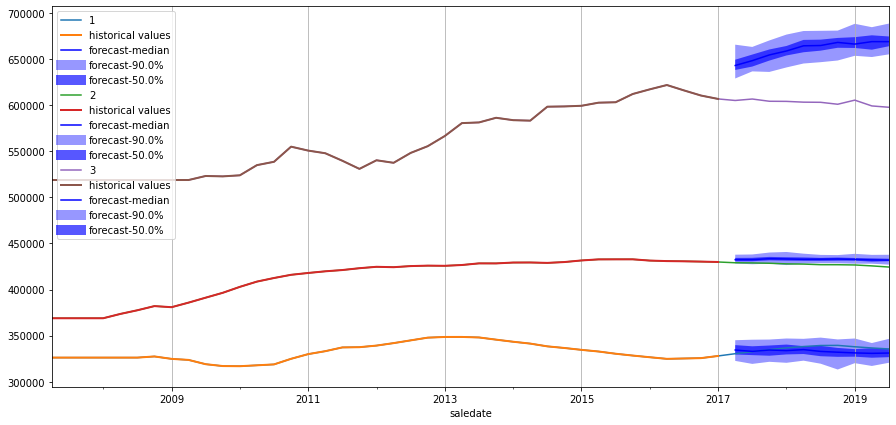

In [23]:
from gluonts.dataset.common import ListDataset
from gluonts.mx import DeepAREstimator, Trainer
from gluonts.dataset.util import to_pandas
import matplotlib.pyplot as plt


def gluonts_train(df, idx):
  predictions = 10
  train = ListDataset(
    [{"start": df.index[0], "target": df[idx][:-predictions]}],
    freq = "Q"
  )
  estimator = DeepAREstimator(freq="Q", prediction_length=10, trainer=Trainer(epochs=20))
  predictor = estimator.train(training_data=train)
  test = ListDataset(
    [{"start": df.index[0], "target": df[idx][:-predictions]}],
    freq = "Q"
  )
  df[idx].plot()
  for test_entry, forecast in zip(test, predictor.predict(test)):
    to_pandas(test_entry).plot(linewidth=2, figsize=(15, 7), label="historical values")
    forecast.plot(prediction_intervals=[50.0, 90.0], label="forecast")
  plt.legend(loc='upper left')
  plt.grid(axis='x')


for idx in unit_train.columns:
  gluonts_train(unit_train, idx)


100%|██████████| 50/50 [00:02<00:00, 17.62it/s, epoch=20/20, avg_epoch_loss=10.8]


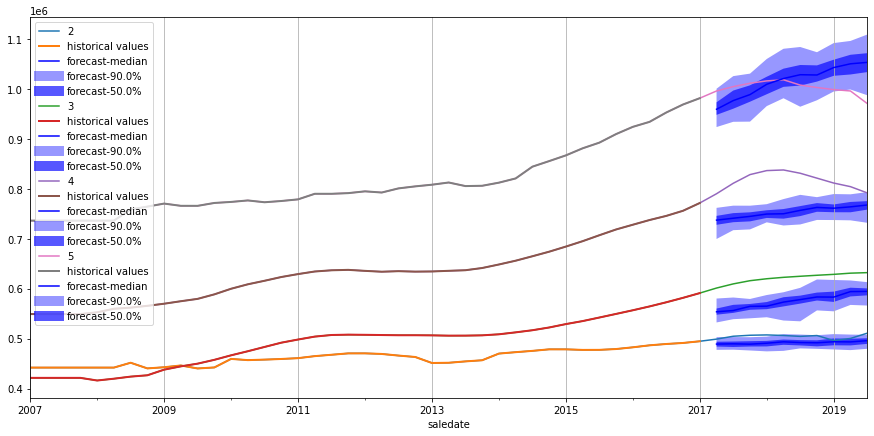

In [24]:
for idx in house_train.columns:
  gluonts_train(house_train, idx)

In [ ]:
!pip install neuralprophet

In [49]:
error = mean_absolute_percentage_error(train[-predictions:]['y'].to_numpy(), forecast['yhat1'].to_numpy())

print("Mean absolute percentage error {0:.2f}%".format(error))
_ = model.plot(forecast)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


Mean absolute percentage error 6.34%


In [51]:
from neuralprophet import NeuralProphet

def model_neuralprophet_train(df, idx):
  train = pd.DataFrame({"y": df[idx]}).reset_index().rename(columns={"saledate":"ds"})
  predictions = 10
  model = NeuralProphet()
  model.fit(train[:-predictions], freq="Q")
  future = model.make_future_dataframe(train[:-predictions], periods=10)
  forecast = model.predict(future)
  error = mean_absolute_percentage_error(train[-predictions:]['y'].to_numpy(), forecast['yhat1'].to_numpy())
  print("Mean absolute percentage error {0:.2f}%".format(error))
  _ = model.plot(forecast)

for idx in unit_train.columns:
  model_neuralprophet_train(unit_train, idx)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency Q corresponds to 80.0% of the data.
INFO:NP.df_utils:Major frequency Q corresponds to 80.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Q
INFO:NP.df_utils:Defined frequency is equal to major frequency - Q
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seaso

Finding best initial lr:   0%|          | 0/203 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency Q corresponds to 80.0% of the data.
INFO:NP.df_utils:Major frequency Q corresponds to 80.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Q
INFO:NP.df_utils:Defined frequency is equal to major frequency - Q
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency Q corresponds to 70.0% of the data.
INFO:NP.df_utils:Major frequency Q corresponds to 70.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Q
INFO:NP.df_utils:Defined frequency is equal to major frequency - Q
INFO - (NP.df_utils._infer_frequency) - Major frequency Q corresponds to 70.0% of the data.
INFO:NP.df_utils:Major frequency Q corresponds to 70.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to ma

Predicting: 3it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency Q corresponds to 80.0% of the data.
INFO:NP.df_utils:Major frequency Q corresponds to 80.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Q
INFO:NP.df_utils:Defined frequency is equal to major frequency - Q
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - 

Mean absolute percentage error 7.07%


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (3) is too small than the required number for the learning rate finder (203). The results might not be optimal.


Finding best initial lr:   0%|          | 0/203 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency Q corresponds to 80.0% of the data.
INFO:NP.df_utils:Major frequency Q corresponds to 80.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Q
INFO:NP.df_utils:Defined frequency is equal to major frequency - Q
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency Q corresponds to 70.0% of the data.
INFO:NP.df_utils:Major frequency Q corresponds to 70.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Q
INFO:NP.df_utils:Defined frequency is equal to major frequency - Q
INFO - (NP.df_utils._infer_frequency) - Major frequency Q corresponds to 70.0% of the data.
INFO:NP.df_utils:Major frequency Q corresponds to 70.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to ma

Predicting: 3it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency Q corresponds to 80.0% of the data.
INFO:NP.df_utils:Major frequency Q corresponds to 80.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Q
INFO:NP.df_utils:Defined frequency is equal to major frequency - Q
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - 

Mean absolute percentage error 1.58%


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (3) is too small than the required number for the learning rate finder (203). The results might not be optimal.


Finding best initial lr:   0%|          | 0/203 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency Q corresponds to 80.0% of the data.
INFO:NP.df_utils:Major frequency Q corresponds to 80.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Q
INFO:NP.df_utils:Defined frequency is equal to major frequency - Q
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency Q corresponds to 70.0% of the data.
INFO:NP.df_utils:Major frequency Q corresponds to 70.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Q
INFO:NP.df_utils:Defined frequency is equal to major frequency - Q
INFO - (NP.df_utils._infer_frequency) - Major frequency Q corresponds to 70.0% of the data.
INFO:NP.df_utils:Major frequency Q corresponds to 70.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to ma

Predicting: 3it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


Mean absolute percentage error 4.53%


In [53]:
for idx in house_train.columns:
  model_neuralprophet_train(house_train, idx)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency Q corresponds to 80.488% of the data.
INFO:NP.df_utils:Major frequency Q corresponds to 80.488% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Q
INFO:NP.df_utils:Defined frequency is equal to major frequency - Q
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_s

Finding best initial lr:   0%|          | 0/203 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency Q corresponds to 80.488% of the data.
INFO:NP.df_utils:Major frequency Q corresponds to 80.488% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Q
INFO:NP.df_utils:Defined frequency is equal to major frequency - Q
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency Q corresponds to 70.0% of the data.
INFO:NP.df_utils:Major frequency Q corresponds to 70.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Q
INFO:NP.df_utils:Defined frequency is equal to major frequency - Q
INFO - (NP.df_utils._infer_frequency) - Major frequency Q corresponds to 70.0% of the data.
INFO:NP.df_utils:Major frequency Q corresponds to 70.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal t

Predicting: 3it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency Q corresponds to 80.488% of the data.
INFO:NP.df_utils:Major frequency Q corresponds to 80.488% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Q
INFO:NP.df_utils:Defined frequency is equal to major frequency - Q
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INF

Mean absolute percentage error 1.11%


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (3) is too small than the required number for the learning rate finder (203). The results might not be optimal.


Finding best initial lr:   0%|          | 0/203 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency Q corresponds to 80.488% of the data.
INFO:NP.df_utils:Major frequency Q corresponds to 80.488% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Q
INFO:NP.df_utils:Defined frequency is equal to major frequency - Q
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency Q corresponds to 70.0% of the data.
INFO:NP.df_utils:Major frequency Q corresponds to 70.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Q
INFO:NP.df_utils:Defined frequency is equal to major frequency - Q
INFO - (NP.df_utils._infer_frequency) - Major frequency Q corresponds to 70.0% of the data.
INFO:NP.df_utils:Major frequency Q corresponds to 70.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal t

Predicting: 3it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


Mean absolute percentage error 6.13%
